In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

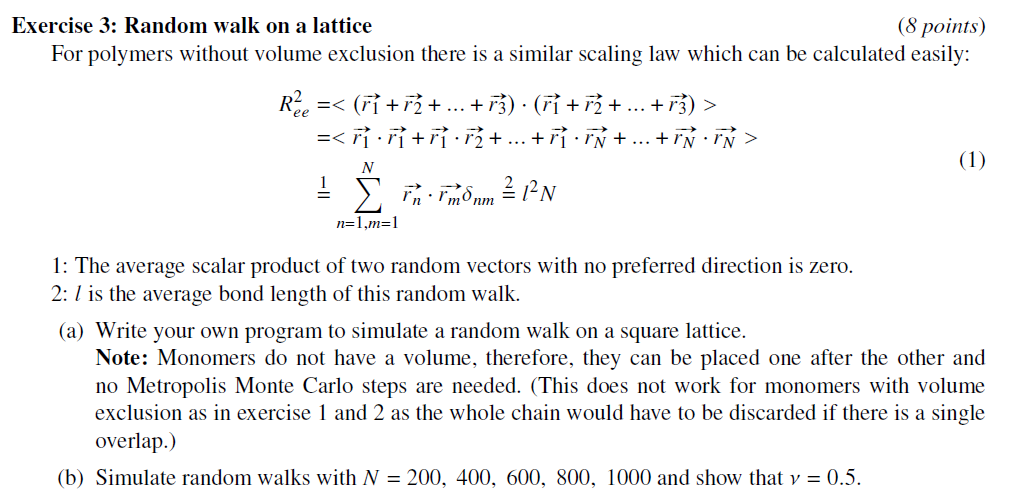

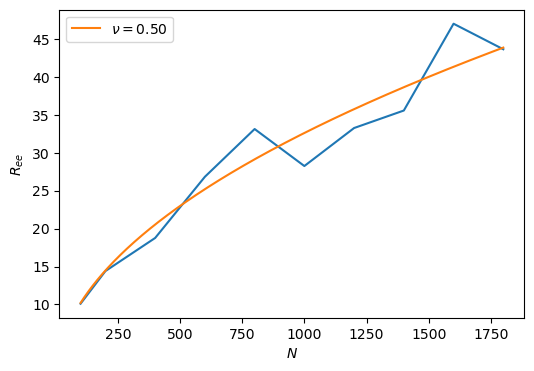

In [79]:
repeats_for_statistics = 40

Ns = np.array([100, 200,400,600,800,1000, 1200, 1400, 1600, 1800])
R2s = np.zeros((len(Ns), repeats_for_statistics))
#print(R2s)

for repeat in range(repeats_for_statistics):
    for j, N in enumerate(Ns):
        history = np.zeros((N, 2))
        possible_moves = np.array([[-1,0],[1,0],[0,-1],[0,1]])

        current_pos = np.array([0,0])
        for i in range(N):
            history[i] = current_pos
            current_pos += possible_moves[np.random.randint(4)]
        R2s[j,repeat] = np.sum(history[-1,:]**2)
        #print(history[-1,:], history[-1,:]**2, np.sum(history[-1,:]**2))
        #break

R2 = np.mean(R2s, axis=1)
R = np.sqrt(R2)
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(Ns, R)

x_fit, y_fit = Ns, R
func = lambda x, pw : np.power(x, pw)
p0 = (1)
coeff, var_matrix = opt.curve_fit(func, x_fit, y_fit, p0 = p0)
ν = coeff[0]
func_ = lambda x : func(x, *coeff)


N_highres = np.linspace(min(Ns),max(Ns), 1000)
ax.plot(N_highres, func_(N_highres), label=f"$ν = {ν:.2f}$")
ax.set_xlabel("$N$")
ax.set_ylabel("$R_{ee}$")
ax.legend()